# Data Visualization with Haberman Dataset

# Haberman's Survival Dataset

Dataset contains cases from study conducted on the survival of patients who had undergone surgery for breast cancer in University of Chicago's Billings Hospital for the duration of 1958 to 1970
        
        .Number of Instances: 306
        .Number of Attributes: 4 (including the class attribute)
        .Attribute Information:
            a) Age of patient at time of operation (numeric)
            b) Patient's year of operation (year - 1900, numerical)
            c) Number of positive axillary nodes detected (numerical)
            d) Survival status (class attribute)
                  1 = the patient survived 5 years or longer 
                  2 = the patient died within 5 year
Dataset Source : https://www.kaggle.com/gilsousa/habermans-survival-data-set/data 

In [14]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np

haberman=pd.read_csv("haberman.csv")

In [15]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
30     305 non-null int64
64     305 non-null int64
1      305 non-null int64
1.1    305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [17]:
'''Dataset contains 305 rows and 4 columns; columns name are missing in the dataset.
    Add the column name, given in the kaggle column metadata tab.'''
haberman.columns=['Age','Operation Year','Auxillary Node','Survival Status']
print(haberman.columns)

Index(['Age', 'Operation Year', 'Auxillary Node', 'Survival Status'], dtype='object')


In [18]:
haberman.head() 

,Age,Operation Year,Auxillary Node,Survival Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [19]:
haberman["Survival Status"].value_counts()

1    224
2     81
Name: Survival Status, dtype: int64

### Observation
    1. Imbalanced dataset.
    2. Post operation out of the 305 patients; 224 patient survived for more than 5 years and 81 patients died    within 5 years.

## 2-D Scatter Plot : 

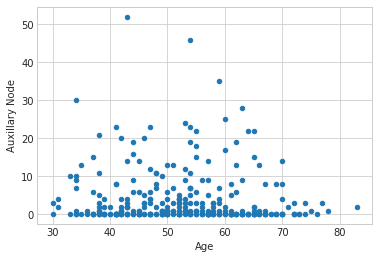

In [44]:
haberman.plot(kind='scatter',x='Age',y='Auxillary Node')
plt.show()

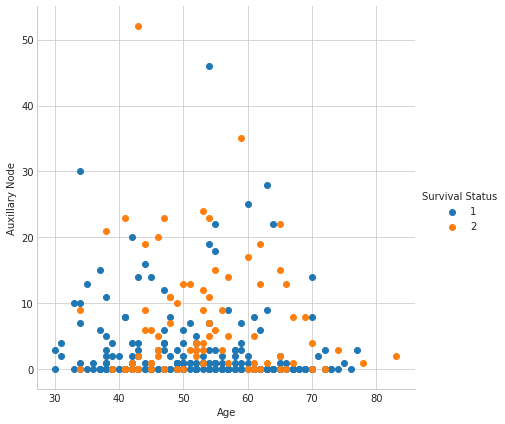

In [48]:
# 2-D Scatter plot with color-coding for each survival status type/class.
sbn.set_style("whitegrid");
sbn.FacetGrid(haberman, hue="Survival Status", size=6) \
   .map(plt.scatter, "Age", "Auxillary Node") \
   .add_legend();
plt.show();

### Observation(s):
    1. A good count of patients have 0 Auxillary Nodes.

## Pair Plot :

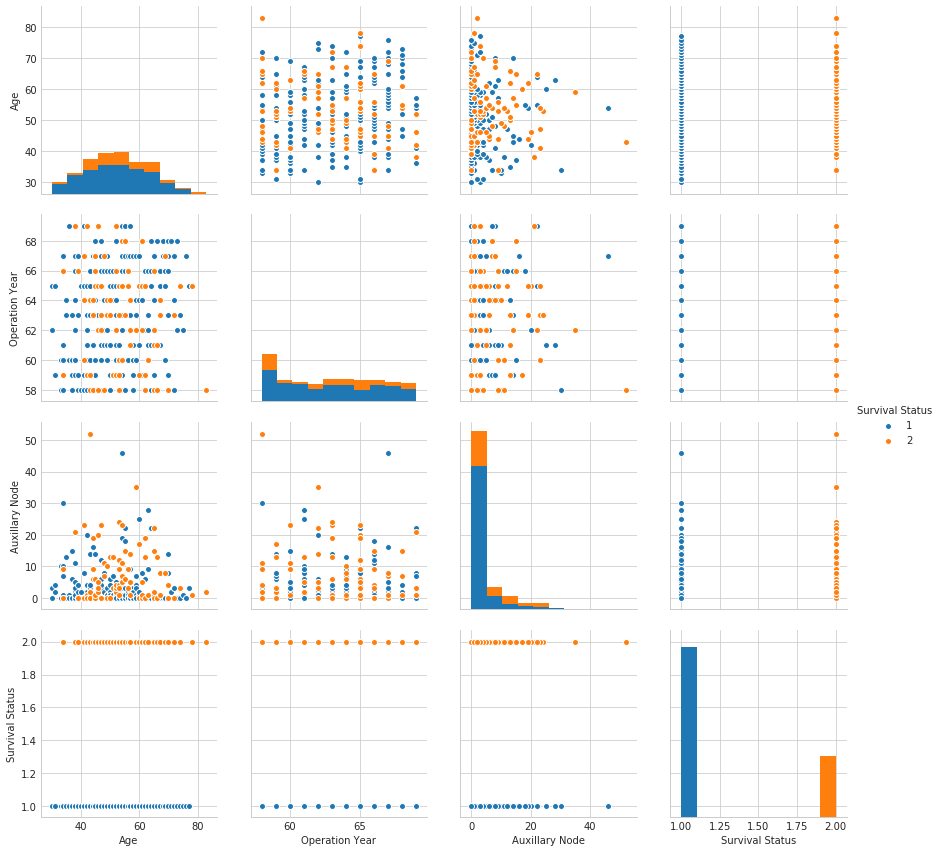

In [57]:
plt.close();
sbn.set_style("whitegrid")
sbn.pairplot(haberman,hue="Survival Status",size=3)
plt.show()

### Observation(s): 
    1. "Age vs Auxillary Node" tells us most of the patients have 0 Auxillary Node post operation.
    2. Most of the plots exhibits overlapping. 

## HISTOGRAM, PDF : 

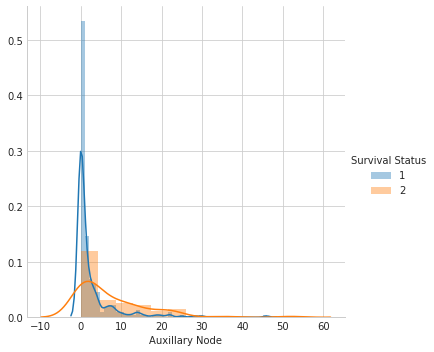

In [61]:
sbn.FacetGrid(haberman, hue="Survival Status", size=5) \
   .map(sbn.distplot, "Auxillary Node") \
   .add_legend();
plt.show();

### Observation(s) : 
    Patients with (<=3) number of axillary nodes have more chance of survival with maximum of patients having 0 Auxillary node.

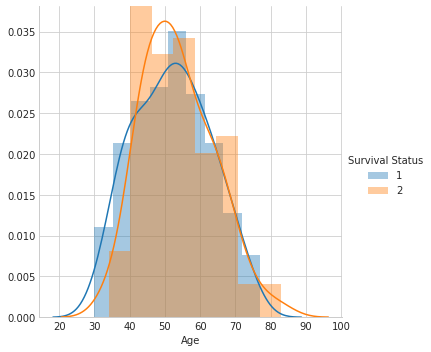

In [63]:
sbn.FacetGrid(haberman, hue="Survival Status", size=5) \
   .map(sbn.distplot, "Age") \
   .add_legend();
plt.show();

### Observation(s):
    Patients with age of <= 40 have more chances of survival than others.
    

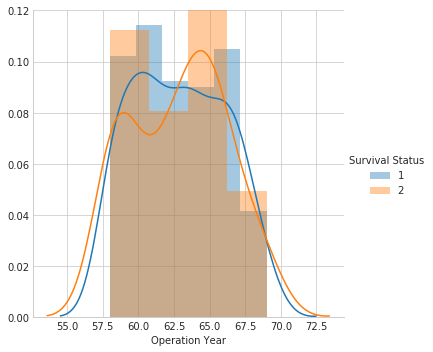

In [64]:
sbn.FacetGrid(haberman, hue="Survival Status", size=5) \
   .map(sbn.distplot, "Operation Year") \
   .add_legend();
plt.show();

### Observation(s):
    Here the histogram shows the year of operation for each patient and it is completely overlapped for both survived and non survived patients. 
    Hence, year of operation hardly depends on the survival of patient.
    But, a  lot of patients operated for the year 1965 died.

## CDF

In [68]:
SurvivedOp=haberman.loc[haberman["Survival Status"]==1]
NotSurvived=haberman.loc[haberman["Survival Status"]==2]

[0.73214286 0.10267857 0.02678571 0.05357143 0.01339286 0.00892857
 0.02232143 0.00446429 0.00892857 0.00892857 0.00446429 0.
 0.00446429 0.00446429 0.         0.         0.         0.
 0.         0.00446429]
[ 0.   2.3  4.6  6.9  9.2 11.5 13.8 16.1 18.4 20.7 23.  25.3 27.6 29.9
 32.2 34.5 36.8 39.1 41.4 43.7 46. ]


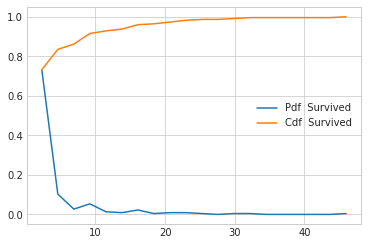

In [69]:
counts, bin_edges = np.histogram(SurvivedOp['Auxillary Node'], bins=20, 
                                 density = True)
##PDF
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
##CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf  Survived',
            'Cdf  Survived'])
plt.show()

[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


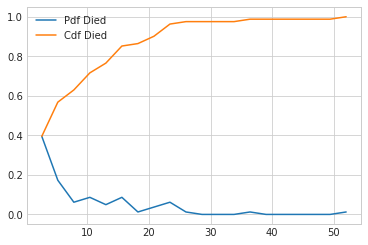

In [71]:
counts, bin_edges = np.histogram(NotSurvived['Auxillary Node'], bins=20, 
                                 density = True)
##PDF
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
##CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf Died',
            'Cdf Died'])
plt.show()

## Summary Stats : 

In [72]:
SurvivedOp.describe()

,Age,Operation Year,Auxillary Node,Survival Status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [73]:
NotSurvived.describe()

,Age,Operation Year,Auxillary Node,Survival Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [75]:
from statsmodels import robust
print("\n Median Absolute Deviation")
print(robust.mad(SurvivedOp['Auxillary Node']))
print(robust.mad(NotSurvived['Auxillary Node']))


 Median Absolute Deviation
0.0
5.930408874022408


### Observation(s):
    1. Here we can observe that taking auxillary nodes into considerations can yield better result as its standard deviation and mean far apart as compared to that of Age and Operation year.
    2. The people who are not survived tend to have more average number of Auxillary nodes and more spread out the distribution than survived.

## Box Plots and Whiskers

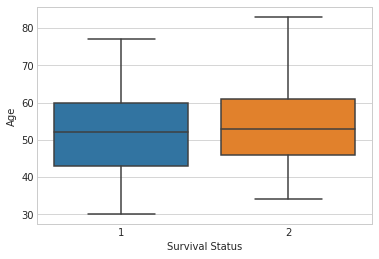

In [78]:
sbn.boxplot(x='Survival Status',y='Age', data=haberman)
plt.show()

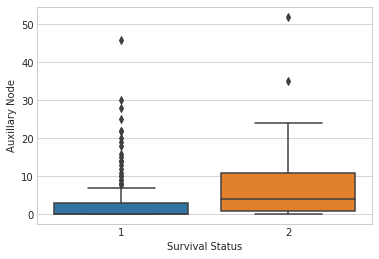

In [79]:
sbn.boxplot(x='Survival Status',y='Auxillary Node', data=haberman)
plt.show()

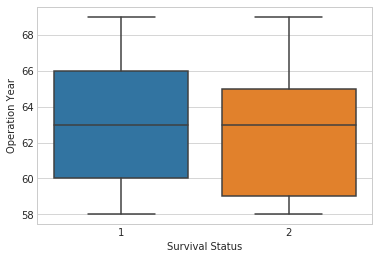

In [80]:
sbn.boxplot(x='Survival Status',y='Operation Year', data=haberman)
plt.show()

### Observation(s):
    1. From box plot number of people dead between age of 46-62.
    2. Number of people survived between age of 42-60.

## Violin Plot

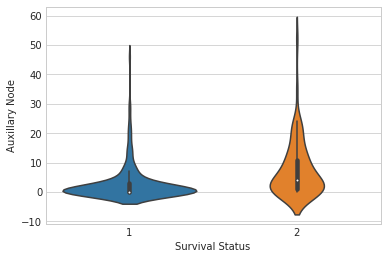

In [81]:
sbn.violinplot(x='Survival Status',y='Auxillary Node', data=haberman)
plt.show()

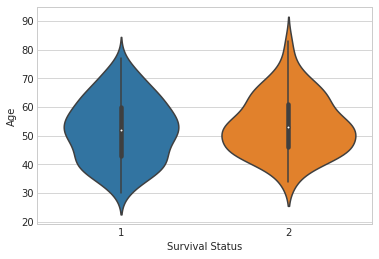

In [82]:
sbn.violinplot(x='Survival Status',y='Age', data=haberman)
plt.show()

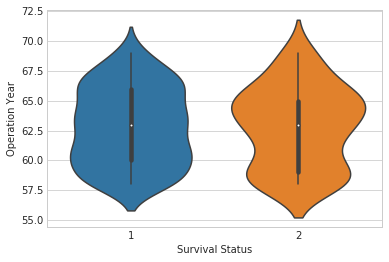

In [83]:
sbn.violinplot(x='Survival Status',y='Operation Year', data=haberman)
plt.show()

### Observation(s):
    1. From violin plot number of people dead between age of 59-65 
    2. Number of people survived between age of 60-66

# Contour Plot

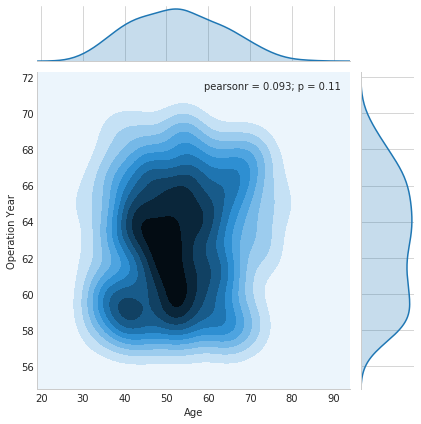

In [85]:
sbn.jointplot(x="Age", y="Operation Year", data=haberman, kind="kde");
plt.show();

### Observation(s):
    There are more no of people undergone operation during the year 1959-1964 and between age 42-59.